In [3]:
# import svm
from sklearn.svm import SVC
# import decision tree
from sklearn.tree import DecisionTreeClassifier

# import minmax scaler
from sklearn.preprocessing import MinMaxScaler

# import confusion matrix
from sklearn.metrics import confusion_matrix

# import pipeline
from sklearn.pipeline import Pipeline
# import grid search
from sklearn.model_selection import GridSearchCV

# import train test split
from sklearn.model_selection import train_test_split

# import accuracy score
from sklearn.metrics import accuracy_score

# import f1 score
from sklearn.metrics import f1_score

# import make scorer
from sklearn.metrics import make_scorer

# import pandas and numpy
import pandas as pd
import numpy as np

# import seaborn
import seaborn as sns

In [4]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

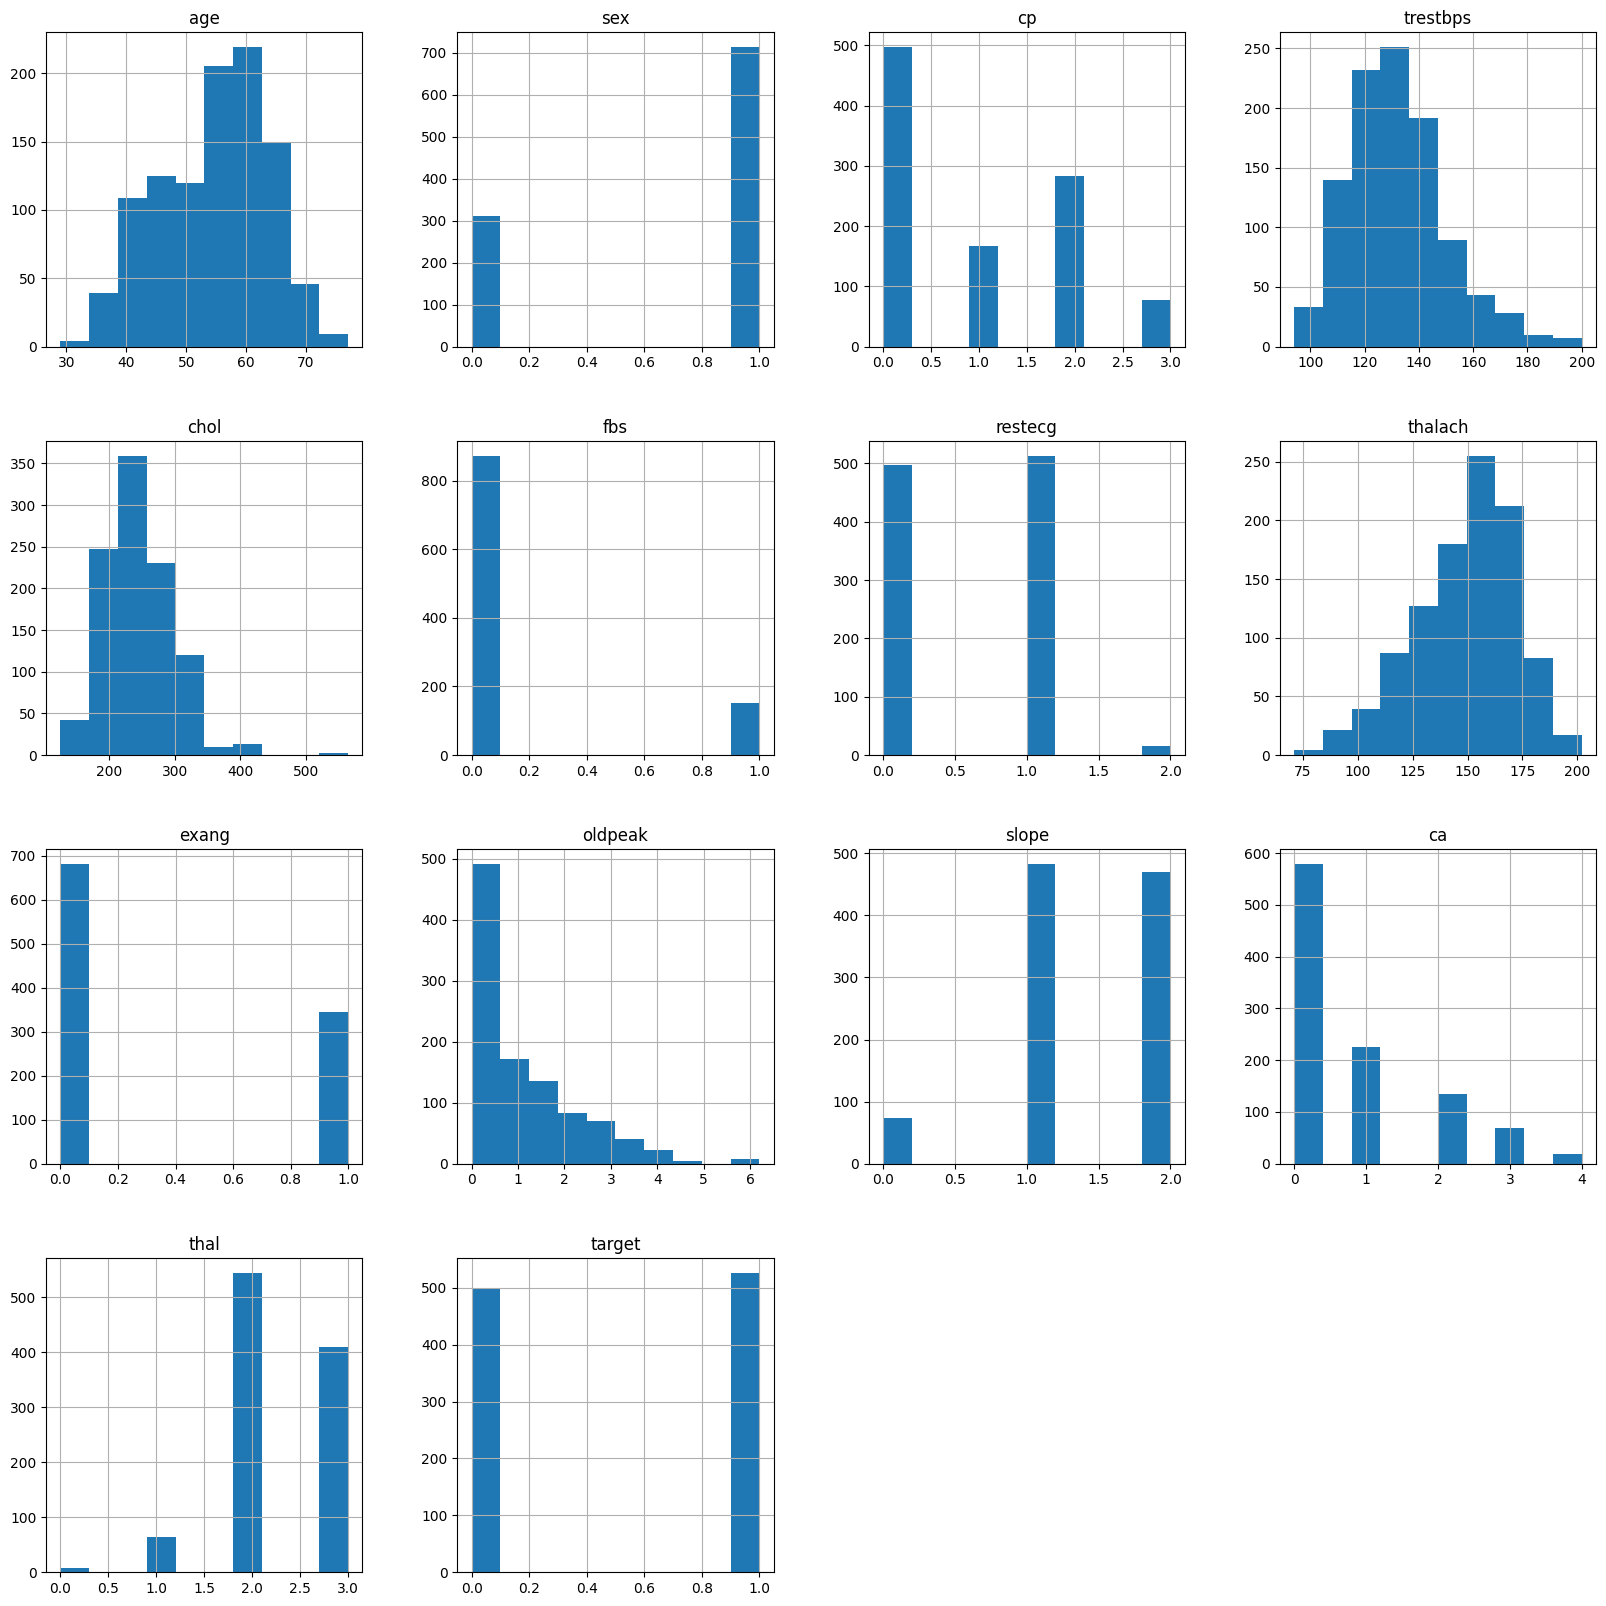

In [7]:
df.hist(figsize=(20, 20))

In [8]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [9]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.2)

In [10]:
# svm pipeline
svm_pipeline = Pipeline([ ('scaler', MinMaxScaler()), ('svm', SVC()) ])

In [11]:
# get parameters of svm pipeline
svm_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('svm', SVC())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'svm': SVC(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'svm__C': 1.0,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

In [17]:
# svm grid search to find best parameters
# C: regularization parameter
# kernel: type of kernel
# gamma: kernel coefficient

svm_gridcv = GridSearchCV(
    svm_pipeline,
    param_grid={ # hyperparameters to tune
        "svm__C": [0.1, 1, 10, 100],
        "svm__kernel": ["linear", "rbf", "sigmoid"],
        "svm__gamma": [0.1, 0.01, 0.001, 0.0001],
    },
    scoring={ # metrics to evaluate
        "accuracy": make_scorer(accuracy_score),
        "f1_score": make_scorer(f1_score),
    },
    return_train_score=True,
    cv=3, # 3-fold cross validation
    verbose=1, 
    n_jobs=-1, # use all cpu cores
    refit="accuracy", # refit the best model on the whole dataset, using accuracy as the metric
)
svm_gridcv.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [0.1, 0.01, 0.001, 0.0001],
                         'svm__kernel': ['linear', 'rbf', 'sigmoid']},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score)},
             verbose=1)

In [18]:
# best parameters
svm_gridcv.best_params_

{'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}

In [19]:
# cross validation results
pd.DataFrame(svm_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__gamma,param_svm__kernel,params,split0_test_accuracy,split1_test_accuracy,...,split1_test_f1_score,split2_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score,split0_train_f1_score,split1_train_f1_score,split2_train_f1_score,mean_train_f1_score,std_train_f1_score
0,0.016662,0.002485,0.015660,0.004322,0.1,0.1,linear,"{'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kerne...",0.824818,0.824176,...,0.836735,0.839590,0.838054,0.001176,16,0.828283,0.854202,0.833333,0.838606,0.011219
1,0.033520,0.009970,0.032086,0.014158,0.1,0.1,rbf,"{'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kerne...",0.755474,0.783883,...,0.801347,0.806667,0.796591,0.010710,33,0.806612,0.808652,0.801336,0.805533,0.003083
2,0.065566,0.005472,0.033153,0.007418,0.1,0.1,sigmoid,"{'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kerne...",0.759124,0.772894,...,0.797386,0.813333,0.798344,0.011867,30,0.803987,0.807309,0.809365,0.806887,0.002216
3,0.020478,0.002287,0.010460,0.000945,0.1,0.01,linear,"{'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kern...",0.824818,0.824176,...,0.836735,0.839590,0.838054,0.001176,16,0.828283,0.854202,0.833333,0.838606,0.011219
4,0.039242,0.008703,0.026586,0.004406,0.1,0.01,rbf,"{'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kern...",0.503650,0.505495,...,0.671533,0.671533,0.670990,0.000768,37,0.671533,0.670717,0.670717,0.670989,0.000385
5,0.039978,0.000830,0.033148,0.016121,0.1,0.01,sigmoid,"{'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kern...",0.503650,0.505495,...,0.671533,0.671533,0.670990,0.000768,37,0.671533,0.670717,0.670717,0.670989,0.000385
6,0.022081,0.004037,0.012079,0.003434,0.1,0.001,linear,"{'svm__C': 0.1, 'svm__gamma': 0.001, 'svm__ker...",0.824818,0.824176,...,0.836735,0.839590,0.838054,0.001176,16,0.828283,0.854202,0.833333,0.838606,0.011219
7,0.037637,0.011106,0.032500,0.013232,0.1,0.001,rbf,"{'svm__C': 0.1, 'svm__gamma': 0.001, 'svm__ker...",0.503650,0.505495,...,0.671533,0.671533,0.670990,0.000768,37,0.671533,0.670717,0.670717,0.670989,0.000385
8,0.048624,0.012399,0.026854,0.005750,0.1,0.001,sigmoid,"{'svm__C': 0.1, 'svm__gamma': 0.001, 'svm__ker...",0.503650,0.505495,...,0.671533,0.671533,0.670990,0.000768,37,0.671533,0.670717,0.670717,0.670989,0.000385
9,0.026786,0.004536,0.015104,0.001388,0.1,0.0001,linear,"{'svm__C': 0.1, 'svm__gamma': 0.0001, 'svm__ke...",0.824818,0.824176,...,0.836735,0.839590,0.838054,0.001176,16,0.828283,0.854202,0.833333,0.838606,0.011219


In [20]:
best_svm = svm_gridcv.best_estimator_

In [21]:
best_svm.score(x_test, y_test)

0.9170731707317074

<AxesSubplot: >

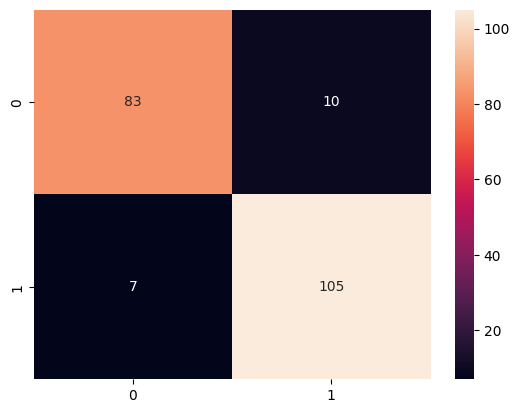

In [23]:
# confusion matrix
y_pred = best_svm.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_svm, annot=True, fmt='d')

In [24]:
# decision tree pipeline
dt_pipeline = Pipeline([ ('scaler', MinMaxScaler()), ('dt', DecisionTreeClassifier()) ])

In [25]:
dt_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('dt', DecisionTreeClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'dt': DecisionTreeClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': None,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__random_state': None,
 'dt__splitter': 'best'}

In [26]:
# decision tree grid search to find best parameters

# parameters to tune:
# criterion: function to measure the quality of a split
# max_depth: maximum depth of the tree

dt_gridcv = GridSearchCV(
    dt_pipeline,
    param_grid={
        "dt__criterion": ["gini", "entropy"],
        "dt__max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    },
    scoring={
        "accuracy": make_scorer(accuracy_score),
        "f1_score": make_scorer(f1_score),
    },
    return_train_score=True,
    cv=3,
    verbose=1,
    n_jobs=-1,
    refit="accuracy",
)

dt_gridcv.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score)},
             verbose=1)

In [27]:
dt_gridcv.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 9}

In [28]:
pd.DataFrame(dt_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split1_test_f1_score,split2_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score,split0_train_f1_score,split1_train_f1_score,split2_train_f1_score,mean_train_f1_score,std_train_f1_score
0,0.008104,0.000171,0.007535,0.002195,gini,2,"{'dt__criterion': 'gini', 'dt__max_depth': 2}",0.755474,0.736264,0.714286,...,0.760000,0.706767,0.754783,0.037259,18,0.806299,0.774834,0.788732,0.789955,0.012875
1,0.009509,0.000727,0.007424,0.002561,gini,3,"{'dt__criterion': 'gini', 'dt__max_depth': 3}",0.813869,0.820513,0.838828,...,0.831615,0.835821,0.834483,0.002029,13,0.866221,0.848276,0.829630,0.848042,0.014939
2,0.012903,0.004970,0.010848,0.004747,gini,4,"{'dt__criterion': 'gini', 'dt__max_depth': 4}",0.839416,0.820513,0.835165,...,0.813688,0.837545,0.828607,0.010618,14,0.858757,0.867159,0.890090,0.872002,0.013242
3,0.014372,0.003341,0.007164,0.000339,gini,5,"{'dt__criterion': 'gini', 'dt__max_depth': 5}",0.894161,0.860806,0.901099,...,0.863309,0.907216,0.888861,0.018633,11,0.923636,0.936170,0.950178,0.936662,0.010841
4,0.015203,0.007518,0.007244,0.002027,gini,6,"{'dt__criterion': 'gini', 'dt__max_depth': 6}",0.930657,0.908425,0.930403,...,0.909091,0.933798,0.924431,0.010935,9,0.972875,0.976407,0.969805,0.973029,0.002697
5,0.010866,0.001457,0.009816,0.002190,gini,7,"{'dt__criterion': 'gini', 'dt__max_depth': 7}",0.959854,0.926740,0.952381,...,0.927007,0.953069,0.946594,0.014113,6,0.994536,0.992727,0.983547,0.990270,0.004811
6,0.012928,0.003635,0.009405,0.003051,gini,8,"{'dt__criterion': 'gini', 'dt__max_depth': 8}",0.959854,0.923077,0.956044,...,0.923077,0.956204,0.946427,0.016584,7,1.000000,0.996377,0.996377,0.997585,0.001708
7,0.011030,0.001924,0.007166,0.000829,gini,9,"{'dt__criterion': 'gini', 'dt__max_depth': 9}",0.959854,0.941392,0.981685,...,0.942446,0.981949,0.961465,0.016160,1,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.012248,0.001384,0.011417,0.004113,gini,10,"{'dt__criterion': 'gini', 'dt__max_depth': 10}",0.959854,0.948718,0.974359,...,0.948529,0.974545,0.961025,0.010646,2,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.010284,0.003620,0.010018,0.003019,entropy,2,"{'dt__criterion': 'entropy', 'dt__max_depth': 2}",0.737226,0.761905,0.714286,...,0.805970,0.706767,0.766991,0.043196,17,0.802377,0.793510,0.788732,0.794873,0.005653


In [29]:
best_dt = dt_gridcv.best_estimator_

In [30]:
best_dt.score(x_test, y_test)

1.0

<AxesSubplot: >

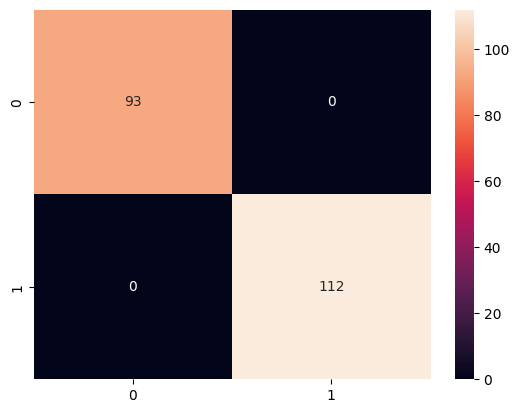

In [31]:
# confusion matrix
y_pred2 = best_dt.predict(x_test)
cm_dt = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm_dt, annot=True, fmt='d')